# About
Compares EOFs and Complex EOFs (CEOFs) by calculating the temporal distribution of the spatial variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert

In [5]:
# ==============================
# Load data
# ==============================

mat = loadmat("../bbm_tidecrittry.mat")
B2s = mat["B2s"]  # adjust key if needed

sz = B2s.shape

# ==============================
# Create complexified data (Hilbert transform row-wise)
# ==============================

B2sc = np.zeros_like(B2s, dtype=np.complex128)

for ii in range(sz[0]):
    B2sc[ii, :] = hilbert(B2s[ii, :])

# ==============================
# Covariance matrices
# ==============================

# MATLAB cov assumes variables in columns → matches B2s shape (space x time)
mymat = np.cov(B2s, rowvar=False)
mymatc = np.cov(B2sc, rowvar=False)
# mymat = np.cov(B2s)
# mymatc = np.cov(B2sc)

# ==============================
# Eigen decomposition (real EOF)
# ==============================

eigvals, V = np.linalg.eig(mymat)

myeigs = eigvals.real
myeigs = myeigs / np.sum(myeigs)

# sort descending
myeigsi = np.argsort(myeigs)[::-1]
myeigs = myeigs[myeigsi]

# ==============================
# Eigen decomposition (complex EOF)
# ==============================

eigvalsc, Vc = np.linalg.eig(mymatc)

# eigenvalues are real even though matrix is complex
myeigsc = eigvalsc.real
myeigsc = myeigsc / np.sum(myeigsc)

myeigsci = np.argsort(myeigsc)[::-1]
myeigsc = myeigsc[myeigsci]


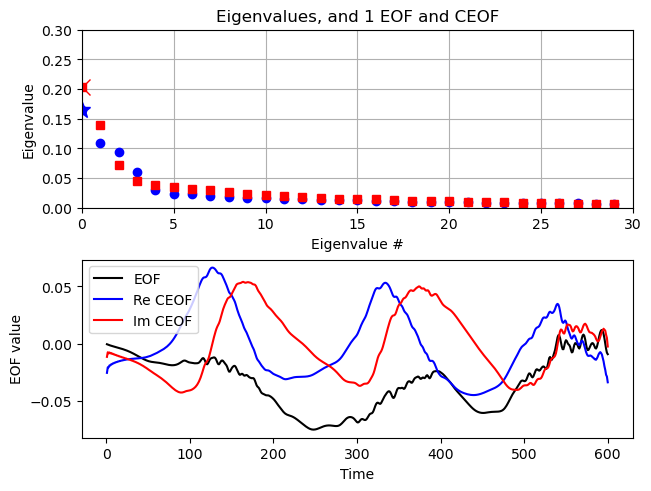

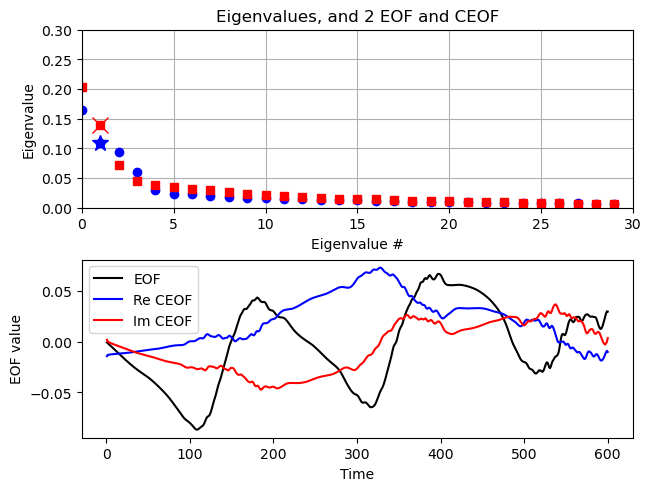

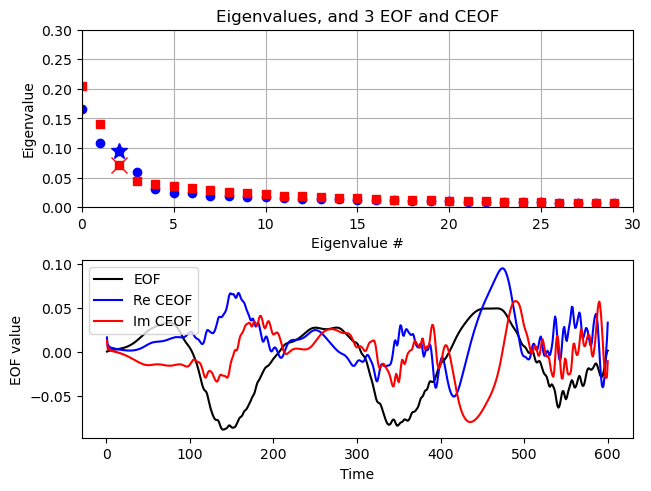

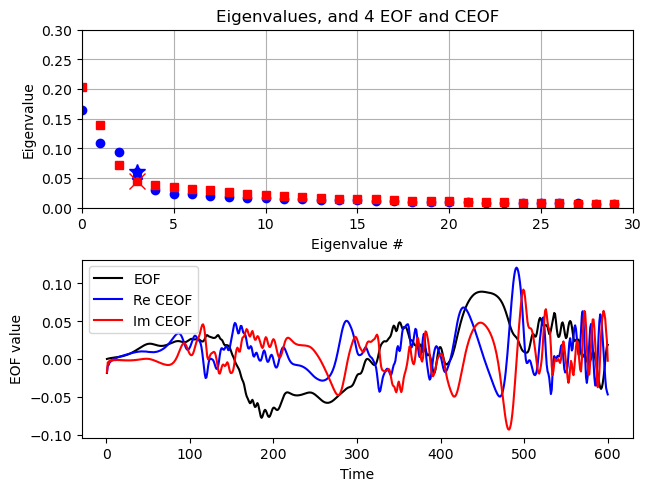

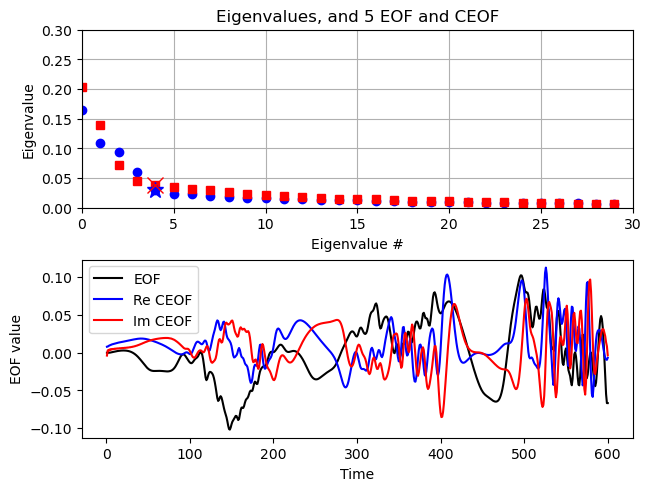

In [8]:
# ==============================
# Plot comparisons
# ==============================

for eofi in range(5):

    plt.figure(eofi + 1, layout='constrained')
    plt.clf()

    # ----- Eigenvalues -----
    plt.subplot(2, 1, 1)
    plt.plot(myeigs[:30], "bo")
    plt.plot(myeigsc[:30], "rs")

    plt.plot(eofi, myeigs[eofi], "b*", markersize=12)
    plt.plot(eofi, myeigsc[eofi], "rx", markersize=12)

    plt.grid(True)
    plt.xlim(0, 30)
    plt.ylim(0, 0.3)
    plt.xlabel('Eigenvalue #')
    plt.ylabel('Eigenvalue')
    plt.title(f"Eigenvalues, and {eofi+1} EOF and CEOF")

    # ----- EOF vs CEOF mode -----
    plt.subplot(2, 1, 2)

    eofnow = V[:, myeigsi[eofi]]
    ceofnow = Vc[:, myeigsci[eofi]]

    plt.plot(np.arange(1, 601), eofnow.real, "k")
    plt.plot(np.arange(1, 601), ceofnow.real, "b")
    plt.plot(np.arange(1, 601), ceofnow.imag, "r")

    plt.xlabel('Time')
    plt.ylabel('EOF value')
    plt.legend(["EOF", "Re CEOF", "Im CEOF"])

plt.show()

Observations:
- Real and imaginary eigenvalues decrease at a similar rate for the first 5 EOFs
- Mode 1 EOFs oscillate with time, similar for later modes
- Variability in the EOFs is higher-frequency after time = 500
- EOF magnitude seems to increase with mode number